# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
from pandas.io import sql
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
#import statsmodels.api as sm
import sklearn as skl

%matplotlib inline

In [2]:
conn = sqlite3.connect('../assets/wmata.db')

In [3]:
merged_data = pd.read_sql('SELECT * from merged_data', con=conn)

In [4]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264303 entries, 0 to 2264302
Data columns (total 14 columns):
ENTDATESERVICETYPE    object
ENTDATEDAYOFWEEK      object
ENTSTATION            object
EXTSTATION            object
ENTPERIOD             object
ENTQUARTHOUR          object
AVG_TRIPS             int64
StnName1              object
StnName2              object
Length                int64
Line                  object
Line1                 object
Line2                 object
Transfer              int64
dtypes: int64(3), object(11)
memory usage: 241.9+ MB


In [5]:
merged_data.head()

,ENTDATESERVICETYPE,ENTDATEDAYOFWEEK,ENTSTATION,EXTSTATION,ENTPERIOD,ENTQUARTHOUR,AVG_TRIPS,StnName1,StnName2,Length,Line,Line1,Line2,Transfer
0,Weekday,Wed,Addison Road,Anacostia,Evening,9:00 PM to 9:15 PM,2,Addison Road,Anacostia,54557,None,Blue,Green,1
1,Weekday,Wed,Addison Road,Anacostia,Evening,9:30 PM to 9:45 PM,2,Addison Road,Anacostia,54557,None,Blue,Green,1
2,Weekday,Thu,Addison Road,Anacostia,AM Peak,5:30 AM to 5:45 AM,1,Addison Road,Anacostia,54557,None,Blue,Green,1
3,Weekday,Wed,Addison Road,Anacostia,PM Peak,4:30 PM to 4:45 PM,1,Addison Road,Anacostia,54557,None,Blue,Green,1
4,Weekday,Fri,Addison Road,Anacostia,AM Peak,6:45 AM to 7:00 AM,1,Addison Road,Anacostia,54557,None,Blue,Green,1


In [6]:
merged_data.groupby('Transfer').AVG_TRIPS.describe()

,count,mean,std,min,25%,50%,75%,max
Transfer,,,,,,,,
0,997079.0,3.412515,6.002158,1.0,1.0,2.0,3.0,323.0
1,1267224.0,1.839542,2.057266,1.0,1.0,1.0,2.0,116.0


In [7]:
merged_data.groupby('Transfer').AVG_TRIPS.sum()

# There are about 50% more trips without transfers than trips with transfers.

Transfer
0    3402547
1    2331112
Name: AVG_TRIPS, dtype: int64

In [8]:
merged_data.groupby('ENTPERIOD').AVG_TRIPS.describe()

,count,mean,std,min,25%,50%,75%,max
ENTPERIOD,,,,,,,,
AM Peak,502205.0,3.067552,6.228063,1.0,1.0,1.0,3.0,276.0
Evening,436839.0,1.905347,2.060819,1.0,1.0,1.0,2.0,74.0
Late Night Peak,31416.0,1.621626,1.324379,1.0,1.0,1.0,2.0,45.0
Midday,694590.0,2.088855,2.444813,1.0,1.0,1.0,2.0,252.0
PM Peak,599253.0,3.102105,5.239358,1.0,1.0,2.0,3.0,323.0


In [9]:
merged_data.groupby('ENTPERIOD').AVG_TRIPS.sum()

ENTPERIOD
AM Peak            1540540
Evening             832330
Late Night Peak      50945
Midday             1450898
PM Peak            1858946
Name: AVG_TRIPS, dtype: int64

In [10]:
merged_data.groupby('ENTDATEDAYOFWEEK').AVG_TRIPS.describe()

,count,mean,std,min,25%,50%,75%,max
ENTDATEDAYOFWEEK,,,,,,,,
Fri,368993.0,2.471738,3.958570,1.0,1.0,1.0,2.0,242.0
Mon,424407.0,2.693641,4.578493,1.0,1.0,1.0,3.0,273.0
Sat,276587.0,2.136601,2.526105,1.0,1.0,1.0,2.0,323.0
Sun,205457.0,2.129755,3.405116,1.0,1.0,1.0,2.0,252.0
Thu,347612.0,2.596717,4.692651,1.0,1.0,1.0,2.0,238.0
Tue,319200.0,2.724389,5.030952,1.0,1.0,1.0,2.0,276.0
Wed,322047.0,2.725071,4.981162,1.0,1.0,1.0,2.0,264.0


In [11]:
merged_data.groupby('ENTDATEDAYOFWEEK').AVG_TRIPS.sum()

ENTDATEDAYOFWEEK
Fri     912054
Mon    1143200
Sat     590956
Sun     437573
Thu     902650
Tue     869625
Wed     877601
Name: AVG_TRIPS, dtype: int64

In [12]:
merged_data.groupby('ENTDATESERVICETYPE').AVG_TRIPS.describe()

,count,mean,std,min,25%,50%,75%,max
ENTDATESERVICETYPE,,,,,,,,
Saturday,276587.0,2.136601,2.526105,1.0,1.0,1.0,2.0,323.0
Saturday Holiday,139631.0,2.550888,3.371345,1.0,1.0,1.0,3.0,172.0
Sunday,205457.0,2.129755,3.405116,1.0,1.0,1.0,2.0,252.0
Weekday,1642628.0,2.647554,4.735250,1.0,1.0,1.0,2.0,276.0


In [13]:
merged_data.groupby('ENTDATESERVICETYPE').AVG_TRIPS.sum()

ENTDATESERVICETYPE
Saturday             590956
Saturday Holiday     356183
Sunday               437573
Weekday             4348947
Name: AVG_TRIPS, dtype: int64

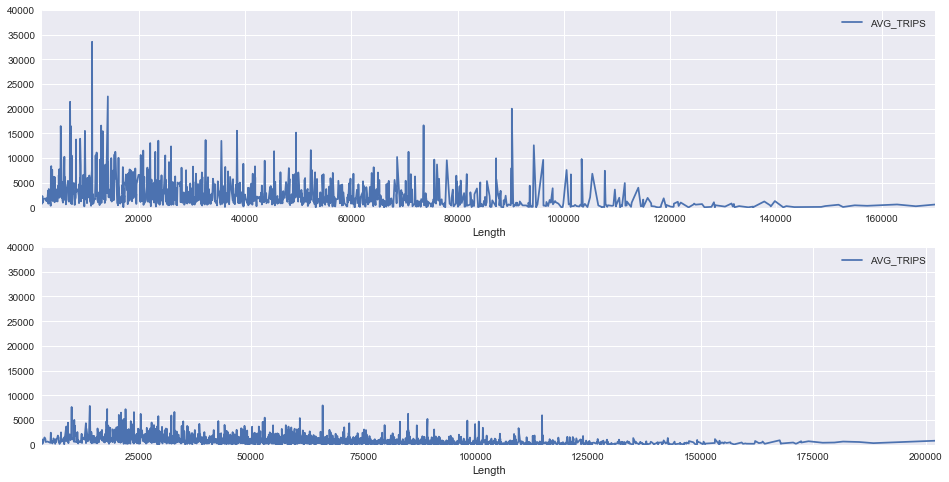

In [14]:
no_trans = merged_data.loc[merged_data.Transfer==0].groupby('Length', as_index=False).AVG_TRIPS.sum()
no_trans_df = pd.DataFrame(no_trans)
has_trans = merged_data.loc[merged_data.Transfer==1].groupby('Length', as_index=False).AVG_TRIPS.sum()
has_trans_df = pd.DataFrame(has_trans)

fig, axes = plt.subplots(nrows=2, sharey=True)

plt.ylim(ymax=40000)
no_trans_df.plot(kind='line', x='Length', y='AVG_TRIPS', figsize=(16, 8), legend=True, ax=axes[0])
has_trans_df.plot(kind='line', x='Length', y='AVG_TRIPS', figsize=(16, 8), legend=True, ax=axes[1]);


In [15]:
no_trans_df.head()

,Length,AVG_TRIPS
0,1754,803
1,1768,2323
2,1786,1174
3,1872,1055
4,1878,1547


In [16]:
len(merged_data.Length.unique())

4021

In [17]:
print("AVG_TRIPS sum:", merged_data.AVG_TRIPS.sum())
print("AVG_TRIPS max:", merged_data.AVG_TRIPS.max())


AVG_TRIPS sum: 5733659
AVG_TRIPS max: 323


In [18]:
quarthours = merged_data.ENTQUARTHOUR.unique()
quarthours.sort()

In [19]:
quarthours

array(['10:00 AM to 10:15 AM', '10:00 PM to 10:15 PM',
       '10:15 AM to 10:30 AM', '10:15 PM to 10:30 PM',
       '10:30 AM to 10:45 AM', '10:30 PM to 10:45 PM',
       '10:45 AM to 11:00 AM', '10:45 PM to 11:00 PM',
       '11:00 AM to 11:15 AM', '11:00 PM to 11:15 PM',
       '11:15 AM to 11:30 AM', '11:15 PM to 11:30 PM',
       '11:30 AM to 11:45 AM', '11:30 PM to 11:45 PM',
       '11:45 AM to 12:00 PM', '11:45 PM to 12:00 AM',
       '12:00 AM to 12:15 AM', '12:00 PM to 12:15 PM',
       '12:15 AM to 12:30 AM', '12:15 PM to 12:30 PM',
       '12:30 AM to 12:45 AM', '12:30 PM to 12:45 PM',
       '12:45 AM to 1:00 AM', '12:45 PM to 1:00 PM', '1:00 AM to 1:15 AM',
       '1:00 PM to 1:15 PM', '1:15 AM to 1:30 AM', '1:15 PM to 1:30 PM',
       '1:30 AM to 1:45 AM', '1:30 PM to 1:45 PM', '1:45 AM to 2:00 AM',
       '1:45 PM to 2:00 PM', '2:00 AM to 2:15 AM', '2:00 PM to 2:15 PM',
       '2:15 AM to 2:30 AM', '2:15 PM to 2:30 PM', '2:30 AM to 2:45 AM',
       '2:30 PM to 2:45 PM',

In [20]:
merged_data_dums = pd.get_dummies(merged_data, prefix=['wday', 'daypart', 'qtrhr'], columns=['ENTDATEDAYOFWEEK', 'ENTPERIOD', 'ENTQUARTHOUR'])
merged_data_dums

,ENTDATESERVICETYPE,ENTSTATION,EXTSTATION,AVG_TRIPS,StnName1,StnName2,Length,Line,Line1,Line2,...,qtrhr_8:45 AM to 9:00 AM,qtrhr_8:45 PM to 9:00 PM,qtrhr_9:00 AM to 9:15 AM,qtrhr_9:00 PM to 9:15 PM,qtrhr_9:15 AM to 9:30 AM,qtrhr_9:15 PM to 9:30 PM,qtrhr_9:30 AM to 9:45 AM,qtrhr_9:30 PM to 9:45 PM,qtrhr_9:45 AM to 10:00 AM,qtrhr_9:45 PM to 10:00 PM
0,Weekday,Addison Road,Anacostia,2,Addison Road,Anacostia,54557,None,Blue,Green,...,0,0,0,1,0,0,0,0,0,0
1,Weekday,Addison Road,Anacostia,2,Addison Road,Anacostia,54557,None,Blue,Green,...,0,0,0,0,0,0,0,1,0,0
2,Weekday,Addison Road,Anacostia,1,Addison Road,Anacostia,54557,None,Blue,Green,...,0,0,0,0,0,0,0,0,0,0
3,Weekday,Addison Road,Anacostia,1,Addison Road,Anacostia,54557,None,Blue,Green,...,0,0,0,0,0,0,0,0,0,0
4,Weekday,Addison Road,Anacostia,1,Addison Road,Anacostia,54557,None,Blue,Green,...,0,0,0,0,0,0,0,0,0,0
5,Weekday,Addison Road,Anacostia,1,Addison Road,Anacostia,54557,None,Blue,Green,...,0,0,0,0,0,0,0,0,0,0
6,Saturday,Addison Road,Anacostia,1,Addison Road,Anacostia,54557,None,Blue,Green,...,0,0,0,0,0,0,0,0,0,0
7,Weekday,Addison Road,Anacostia,1,Addison Road,Anacostia,54557,None,Blue,Green,...,0,0,0,0,0,0,0,0,0,0
8,Sunday,Addison Road,Anacostia,1,Addison Road,Anacostia,54557,None,Blue,Green,...,0,0,0,0,0,0,0,0,0,0
9,Weekday,Addison Road,Anacostia,1,Addison Road,Anacostia,54557,None,Blue,Green,...,0,0,0,0,0,0,0,0,0,0


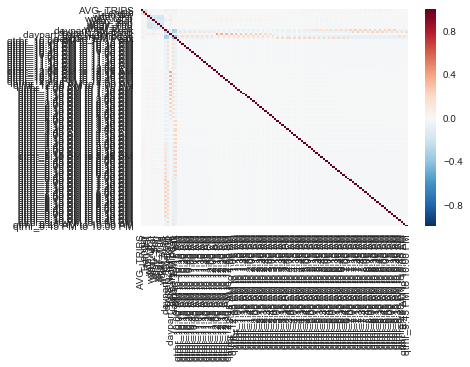

In [21]:
sns.heatmap(merged_data_dums.corr())

In [22]:
merged_data_sub = merged_data.loc[:, ['AVG_TRIPS', 'Transfer', 'Length']]

In [23]:
merged_data_sub.corr()

,AVG_TRIPS,Transfer,Length
AVG_TRIPS,1.000000,-0.179892,-0.127633
Transfer,-0.179892,1.000000,0.288716
Length,-0.127633,0.288716,1.000000


In [24]:
merged_data_dums.to_sql('merged_data_dums', con=conn, index=False, if_exists='replace')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:1362: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)
